# Data Analysis And Machine Learning

That's the first part of project where I'll analysis the data and apply some machine learning models to predict the stock prices. First of all I import the libraries, even I'll using the library in final of code I import it in initiation of code.

First I defined the basic libraries to data analyze, them are:
* Pandas: To data analysis and manipulation tool;
* Numpy: To algebraic manipulation (vectors, matrices, and so on);
* Matplotlib: To data visualization in graphs.

After it I define the libraries of sklearn to metrics analysis and data preprocessing. The metric which will used is the mean squared logarithmic error, define by:

<center>
    <h2>$RMSLE = \sqrt{\frac{1}{N}\sum_{n=1}^{N} (log(y_{n}+1)-log(\hat{y}_n+1))^2}$</h2>
</center>

In words the RMSLE is the squared of variation, or standard deviation in this case, of logarithm of bias and the variation of predictor. Further I'll use MinMaxScaler to define the values in interval between 0 than 1, that's to help the model fit better than using real values.

The models I'll use to start are Random Forest Regressor and LightGBM, both are very good to predict time series in general. In other notebook I'll using reccurent neural network to compare the models and see how is better.

By the sklearn library documentation: A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree. And by the LightGBM library: LightGBM is a gradient boosting framework that uses tree based learning algorithms. It is designed to be distributed and efficient with the following advantages:
* Faster training speed and higher efficiency.
* Lower memory usage.
* Better accuracy.
* Support of parallel and GPU learning.
* Capable of handling large-scale data.

Presumably the LightGBM has a better performance than Random Forest Regressor. But It'll seen in pratice.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
%matplotlib inline

from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import MinMaxScaler


from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb

Populating the interactive namespace from numpy and matplotlib




---


Now let's import the data and see more about them, first I'll import the dataset which I downloaded in <a href="https://br.financas.yahoo.com/" target="_blank">Yahoo Finanças</a>.

I did download the data of Itausa (ITSA4) that's a brazilian holding stock of Itau Bank, downloading of all values since when started the negotiation in stock exchange.

So I like start pass my date data to datetime and see the head of dataset and the types of other values. Probably that dataset will be very clean and the clean of null values very lightfull.

In [ ]:
dados = "/content/drive/My Drive/ColabNotebooks/Projetos Portifolio/Prevendo_valor_acoes/itausa.csv"

In [ ]:
dados = pd.read_csv(dados)
dados.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1.01835,1.14360,1.01290,1.08370,0.620248,10285107.0
1,2000-01-04,1.04558,1.04558,0.98023,0.98023,0.561028,12071740.0
2,2000-01-05,0.98568,1.06192,0.94756,1.06192,0.607783,9163033.0
3,2000-01-06,1.05647,1.08370,1.05102,1.07825,0.617129,23085841.0
4,2000-01-07,1.08914,1.10548,1.06192,1.07281,0.614016,11216095.0


In [ ]:
dados['Date'] = pd.to_datetime(dados['Date'])
dados.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

In [ ]:
valores_nulos = dados.isnull().sum()
valores_nulos

Date          0
Open         87
High         87
Low          87
Close        87
Adj Close    87
Volume       87
dtype: int64

In [ ]:
dados.shape

(5152, 7)


---


How we could seen if have some null values? The first hypothesis who we have is that data are the mean of the values previous and next, that is in math equation:

<center>
    <h2> $val_{i} = \frac{val_{i-1} + val_{i+1}}{2}$ </h2>
</center>

First I will catch where that's null values are, and even I knowing that I'll use the close values to modeling I'll apply this concept in all columns to see the result, and to finish I'll sum the null values to see if I have some more one.

In [ ]:
dados_nulos = dados[dados['Close'].isnull() == True].index
dados_nulos

Int64Index([ 255,  260,  278,  300,  301,  334,  346,  347,  352,  367,  378,
             392,  395,  439,  450,  464,  479,  488,  515,  516,  520,  521,
             539,  550,  551,  563,  584,  607,  628,  656,  749,  776,  777,
             781,  782,  825,  826,  859,  860,  868,  903,  917, 1037, 1038,
            1042, 1043, 1080, 1081, 1114, 1122, 1124, 1158, 1179, 1221, 1246,
            1261, 1270, 1299, 1304, 1571, 1594, 1595, 1628, 1633, 1639, 1672,
            1732, 1757, 1772, 1781, 1784, 2434, 2553, 2827, 2838, 2845, 2862,
            2864, 3004, 3005, 3006, 3015, 3036, 3061, 4569, 4828, 5071],
           dtype='int64')

In [ ]:
for i in dados_nulos:
  ope = ((dados['Open'].iloc[i-1] + dados['Open'].iloc[i-1]) / 2)	
  high = ((dados['High'].iloc[i-1] + dados['High'].iloc[i-1]) / 2)	
  low = ((dados['Low'].iloc[i-1] + dados['Low'].iloc[i-1]) / 2)	
  close = ((dados['Close'].iloc[i-1] + dados['Close'].iloc[i-1]) / 2)
  aclose = ((dados['Adj Close'].iloc[i-1] + dados['Adj Close'].iloc[i-1]) / 2)	
  volume = ((dados['Volume'].iloc[i-1] + dados['Volume'].iloc[i-1]) / 2)
  
  dados['Open'].iloc[i] = ope
  dados['High'].iloc[i] = high
  dados['Low'].iloc[i] = low
  dados['Close'].iloc[i] = close
  dados['Adj Close'].iloc[i] = aclose
  dados['Volume'].iloc[i] = volume

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [ ]:
dados.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64



---
It's easy to see that we doesn't have more null values.

We want the Close values to modeling, let's drop all other columns, but the Volume column is attached to Close column so we can leave it to see the final result when we apply the MinMaxScaler with it and morover to see if this column will influence in our results.

Doing it let's get the dates in a interval of 200 days and plot the graph of stock price in all period.


In [ ]:
dados.drop(['High', 'Low', 'Open', 'Adj Close'], axis = 1, inplace=True)

In [ ]:
listofNum = list(filter(lambda i: i%200==0, [a for a in range(dados.shape[0])]))
x = dados['Date'].iloc[listofNum]
x = x.append(dados['Date'].tail(1))
x = np.array(x)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


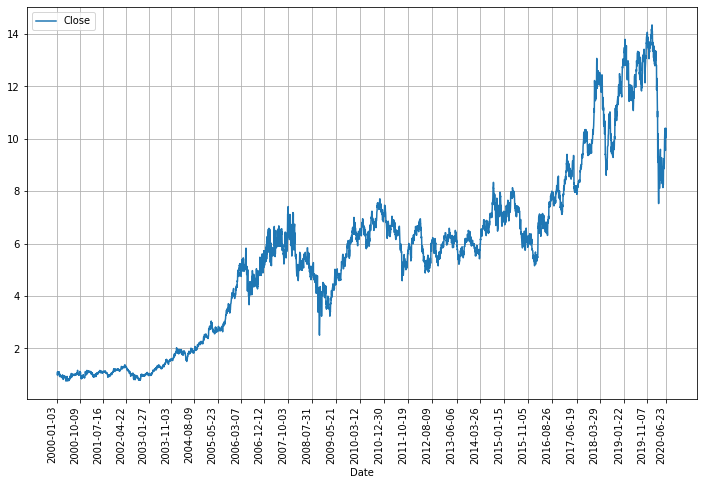

In [ ]:
dados.plot(x='Date', y='Close', figsize=(12,8))   
plt.xticks(x, rotation='vertical')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

---


That's a important step to modeling, because we'll normalize the data, or in other words, we'll range a data interval to we data interval, in this case the interval will be between 0 than 1 and the function which be use is MinMaxScaler.

By sklearn library definition: MinMaxScaler transform features by scaling each feature to a given range. This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.

The transformation is given by:

```python
X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
X_scaled = X_std * (max - min) + min
```

In [ ]:
date = dados['Date']
x_val = dados[['Close','Volume']].values
normalizer = MinMaxScaler(feature_range=(0,1))
x_scaled = normalizer.fit_transform(x_val)
data = pd.DataFrame(x_scaled)
data = pd.concat([date, data], axis=1)
data.columns = dados.columns
data.head()

,Date,Close,Volume
0,2000-01-03,0.024038,0.071490
1,2000-01-04,0.016426,0.083908
2,2000-01-05,0.022436,0.063690
3,2000-01-06,0.023637,0.160465
4,2000-01-07,0.023237,0.077961


In [ ]:
dados.dtypes

Date      datetime64[ns]
Close            float64
Volume           float64
dtype: object



---

Here we'll define the the first target, but that's not just the first target as will the mainly predictor. In other words we want predict the close price, but instead we will predict the differente between the previouly than next price. To do it let's define a function which doing the diference amoung this values.

So the diff() and shift() are native functions of Pandas, by pandas library definition:

* diff(): Calculates the difference of a DataFrame element compared with another element in the DataFrame (default is the element in the same column of the previous row).

* shift(): When freq is not passed, shift the index without realigning the data. If freq is passed (in this case, the index must be date or datetime, or it will raise a NotImplementedError), the index will be increased using the periods and the freq.

That is we will calculate the difference enter the datas and returning that's values one line.

After let's plot the result.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if __name__ == '__main__':


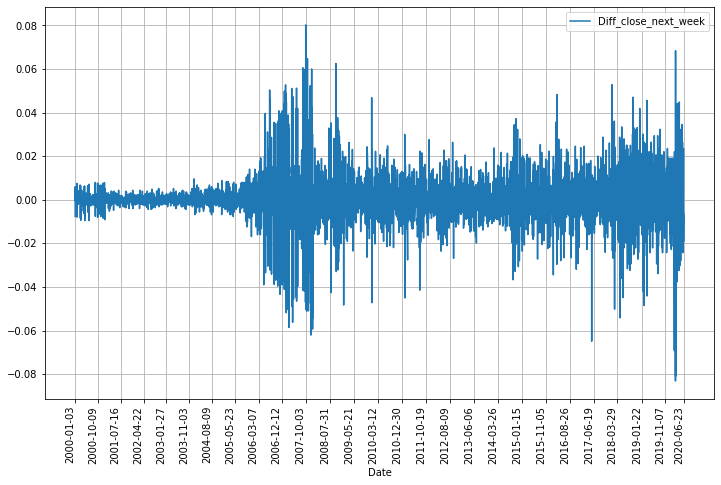

In [ ]:
def target_diff(x):
    return x.diff().shift(-1)

data['Diff_close_next_week'] = target_diff(data['Close'])

data.plot(x='Date', y='Diff_close_next_week', figsize=(12,8))   
plt.xticks(x, rotation='vertical')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()



---

I divided the values in any intervals but the best results are separating the values more to valid than train values. So let's do it and see the columns of dataset and the graph of results.

In [ ]:
train = data[dados['Date'] < '2009-05-21'].copy()
valid = data[dados['Date'] >= '2009-05-21'].copy()
train.shape, valid.shape

((2400, 4), (2752, 4))

In [ ]:
valid.columns

Index(['Date', 'Close', 'Volume', 'Diff_close_next_week'], dtype='object')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


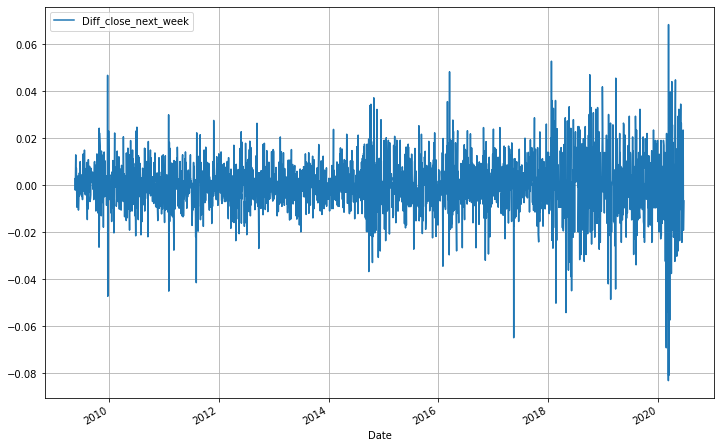

In [ ]:
valid.plot(x='Date', y='Diff_close_next_week', figsize=(12,8))   
#plt.xticks(x, rotation='vertical')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()



---



In [ ]:
y_treino = train['Close']
y_valid = valid['Close']

In [ ]:
#baseline
baseline_treino = train['Close'].shift(1)
baseline_valid = valid['Close'].shift(1)
train['baseline'] = baseline_treino
valid['baseline'] = baseline_valid

In [ ]:
print("Erro:",round(np.sqrt(mean_squared_log_error(y_valid[baseline_valid.notnull()], 
                            baseline_valid[baseline_valid.notnull()]))*100, 2),"%")

Erro: 0.74 %




---



---



In [ ]:
train['Day'] = train['Date'].dt.day
train['Mouth'] = train['Date'].dt.month
train['Weeks_day'] = train['Date'].dt.weekday
train.drop('baseline', axis = 1, inplace=True)

In [ ]:
valid['Day'] = valid['Date'].dt.day
valid['Mouth'] = valid['Date'].dt.month
valid['Weeks_day'] = valid['Date'].dt.weekday
valid.drop('baseline', axis = 1, inplace=True)



---



---



In [ ]:
for i in range(0, 7):
  train['Average_close_price_{}'.format(i)] = train['Close'].shift(i)
  valid['Average_close_price_{}'.format(i)] = valid['Close'].shift(i)



---



---



In [ ]:
for i in range(1, 7):
  train['Diff_avarage_close_price_{}'.format(i)] = train['Close'].diff(i)
  valid['Diff_avarage_close_price_{}'.format(i)] = valid['Close'].diff(i)



---



---



In [ ]:
for i in range(2, 7):
  train['Moving_avarage_close_price_{}_weeks'.format(i)] = train['Close'].rolling(i).mean().reset_index(level=0, drop=True)
  valid['Moving_avarage_close_price_{}_weeks'.format(i)] = valid['Close'].rolling(i).mean().reset_index(level=0, drop=True)



---



---



In [ ]:
train = train.dropna()
valid = valid.dropna()

In [ ]:
train.head()

,Date,Close,Volume,Diff_close_next_week,Day,Mouth,Weeks_day,Average_close_price_0,Average_close_price_1,Average_close_price_2,Average_close_price_3,Average_close_price_4,Average_close_price_5,Average_close_price_6,Diff_avarage_close_price_1,Diff_avarage_close_price_2,Diff_avarage_close_price_3,Diff_avarage_close_price_4,Diff_avarage_close_price_5,Diff_avarage_close_price_6,Moving_avarage_close_price_2_weeks,Moving_avarage_close_price_3_weeks,Moving_avarage_close_price_4_weeks,Moving_avarage_close_price_5_weeks,Moving_avarage_close_price_6_weeks
6,2000-01-11,0.025640,0.051961,-0.001602,11,1,1,0.025640,0.026041,0.023237,0.023637,0.022436,0.016426,0.024038,-0.000401,0.002403,0.002003,0.003205,0.009214,0.001602,0.025841,0.024973,0.024639,0.024198,0.022903
7,2000-01-12,0.024038,0.028858,-0.001602,12,1,2,0.024038,0.025640,0.026041,0.023237,0.023637,0.022436,0.016426,-0.001602,-0.002003,0.000801,0.000401,0.001602,0.007612,0.024839,0.025240,0.024739,0.024519,0.024172
8,2000-01-13,0.022436,0.073263,0.000400,13,1,3,0.022436,0.024038,0.025640,0.026041,0.023237,0.023637,0.022436,-0.001602,-0.003205,-0.003606,-0.000801,-0.001201,0.000000,0.023237,0.024038,0.024539,0.024278,0.024172
9,2000-01-14,0.022836,0.074208,0.002804,14,1,4,0.022836,0.022436,0.024038,0.025640,0.026041,0.023237,0.023637,0.000400,-0.001202,-0.002804,-0.003205,-0.000401,-0.000801,0.022636,0.023103,0.023737,0.024198,0.024038
10,2000-01-17,0.025640,0.035776,-0.002003,17,1,0,0.025640,0.022836,0.022436,0.024038,0.025640,0.026041,0.023237,0.002804,0.003205,0.001602,0.000000,-0.000401,0.002403,0.024238,0.023637,0.023737,0.024118,0.024439


In [ ]:
train.drop(['Date', 'Close'], axis = 1, inplace=True)
valid.drop(['Date', 'Close'], axis=1, inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,




---



---



In [ ]:
X_train, y_train = train.drop('Diff_close_next_week', axis=1), train['Diff_close_next_week']
X_valid, y_valid = valid.drop('Diff_close_next_week', axis=1), valid['Diff_close_next_week']
y_valid_f = X_valid['Average_close_price_0'] + y_valid

In [ ]:
model = RandomForestRegressor(n_jobs=-1, 
                              random_state=0,
                              n_estimators=1500,
                              min_samples_leaf=264,
                              max_features='auto')

model.fit(X_train, y_train)
p = model.predict(X_valid)

p_final = X_valid['Average_close_price_0'] + p
print("Error:",round(np.sqrt(mean_squared_log_error(y_valid_f, p_final))*100, 2),"%")

Erro: 0.67 %


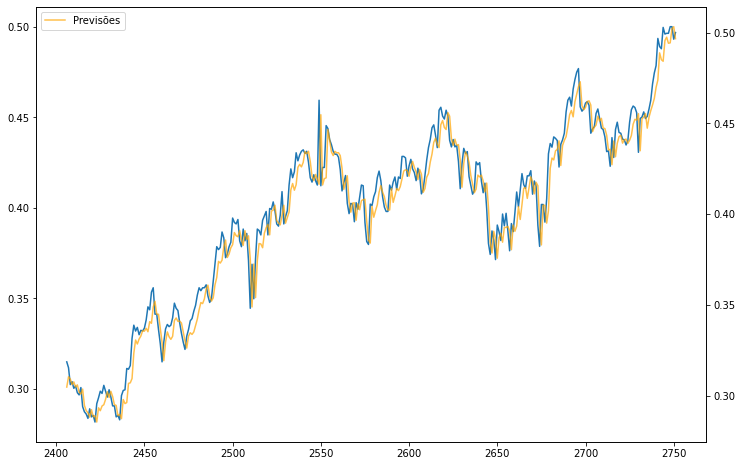

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize = (12, 8))
ax.plot(y_valid_f, label='Y')
axt = ax.twinx()
axt.plot(p_final, color='orange', alpha=0.7, label='Previsões')
axt.legend()

In [ ]:
model = lgb.LGBMRegressor(n_jobs=-1, 
                          random_state=0, 
                          n_estimators=1000, 
                          learning_rate=0.0001, 
                          num_leaves=2**4, 
                          subsample=0.1, 
                          subsample_freq=1)
model.fit(X_train, y_train)
p = model.predict(X_valid)
p_final = X_valid['Average_close_price_0'] + p

print("Error:",round(np.sqrt(mean_squared_log_error(y_valid_f, p_final))*100, 2),"%")

Erro: 0.63 %


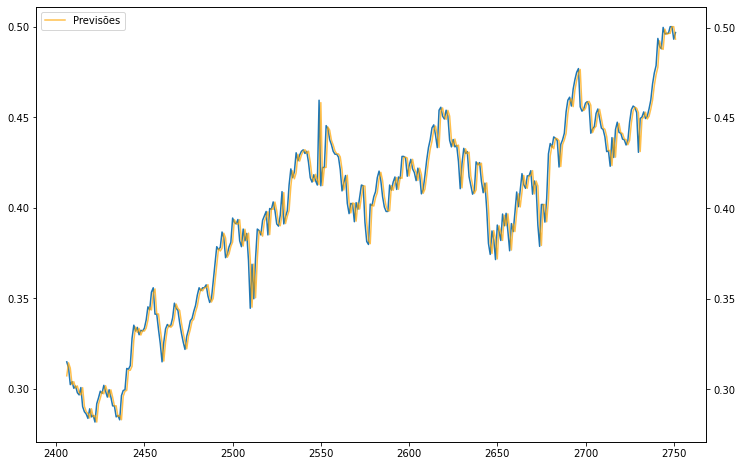

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize=(12,8))
ax.plot(y_valid_f, label = 'Y')
axt = ax.twinx()
axt.plot(p_final, color = 'orange', alpha = 0.7, label='Previsões')
axt.legend()



---



---



In [ ]:
accept = []
vl_low_error = 10000

for step in range(20):
    var_low_error = None
    for var in X_train.columns:
        if var in accept:
            continue
        model.fit(X_train[accept+[var]], y_train)
        p = model.predict(X_valid[accept+[var]])

        p_final = X_valid['Average_close_price_0'] + p
        y_valid_f = X_valid['Average_close_price_0'] + y_valid

        error = np.sqrt(mean_squared_log_error(y_valid_f, p_final)) * 100

        if error < vl_low_error:
            var_low_error = var
            vl_low_error = error
    if var_low_error is None:
        break
    accept.append(var_low_error)
        
    print("Melhor Variável: {} - Erro: {:.4f}\n".format(var_low_error, vl_low_error))
    print(accept)
    print()

Melhor Variável: Diff_avarage_close_price_2 - Erro: 0.6308

['Diff_avarage_close_price_2']

Melhor Variável: Diff_avarage_close_price_6 - Erro: 0.6303

['Diff_avarage_close_price_2', 'Diff_avarage_close_price_6']

Melhor Variável: Volume - Erro: 0.6301

['Diff_avarage_close_price_2', 'Diff_avarage_close_price_6', 'Volume']

Melhor Variável: Average_close_price_0 - Erro: 0.6300

['Diff_avarage_close_price_2', 'Diff_avarage_close_price_6', 'Volume', 'Average_close_price_0']

Melhor Variável: Moving_avarage_close_price_6_weeks - Erro: 0.6300

['Diff_avarage_close_price_2', 'Diff_avarage_close_price_6', 'Volume', 'Average_close_price_0', 'Moving_avarage_close_price_6_weeks']

Melhor Variável: Mouth - Erro: 0.6299

['Diff_avarage_close_price_2', 'Diff_avarage_close_price_6', 'Volume', 'Average_close_price_0', 'Moving_avarage_close_price_6_weeks', 'Mouth']

Melhor Variável: Diff_avarage_close_price_5 - Erro: 0.6298

['Diff_avarage_close_price_2', 'Diff_avarage_close_price_6', 'Volume', 'Aver



---



---



In [ ]:
accept.append('Diff_close_next_week')

In [ ]:
train = train[accept]
train.head()

,Diff_avarage_close_price_2,Diff_avarage_close_price_6,Volume,Average_close_price_0,Moving_avarage_close_price_6_weeks,Mouth,Diff_avarage_close_price_5,Day,Diff_avarage_close_price_1,Diff_close_next_week
6,0.002403,0.001602,0.051961,0.025640,0.022903,1,0.009214,11,-0.000401,-0.001602
7,-0.002003,0.007612,0.028858,0.024038,0.024172,1,0.001602,12,-0.001602,-0.001602
8,-0.003205,0.000000,0.073263,0.022436,0.024172,1,-0.001201,13,-0.001602,0.000400
9,-0.001202,-0.000801,0.074208,0.022836,0.024038,1,-0.000401,14,0.000400,0.002804
10,0.003205,0.002403,0.035776,0.025640,0.024439,1,-0.000401,17,0.002804,-0.002003


In [ ]:
valid = valid[accept]

In [ ]:
X_train, y_train = train.drop('Diff_close_next_week', axis=1), train['Diff_close_next_week']
X_valid, y_valid = valid.drop('Diff_close_next_week', axis=1), valid['Diff_close_next_week']

In [ ]:
y_valid_f = X_valid['Average_close_price_0'] + y_valid

In [ ]:
model = lgb.LGBMRegressor(n_jobs=-1, 
                          random_state=0, 
                          n_estimators=1000, 
                          learning_rate=0.0001, 
                          num_leaves=2**4, 
                          subsample=0.1, 
                          subsample_freq=1)
model.fit(X_train, y_train)
p = model.predict(X_valid)
p_final = X_valid['Average_close_price_0'] + p

print("Error:",round(np.sqrt(mean_squared_log_error(y_valid_f, p_final))*100, 4),"%")

Erro: 0.6298 %


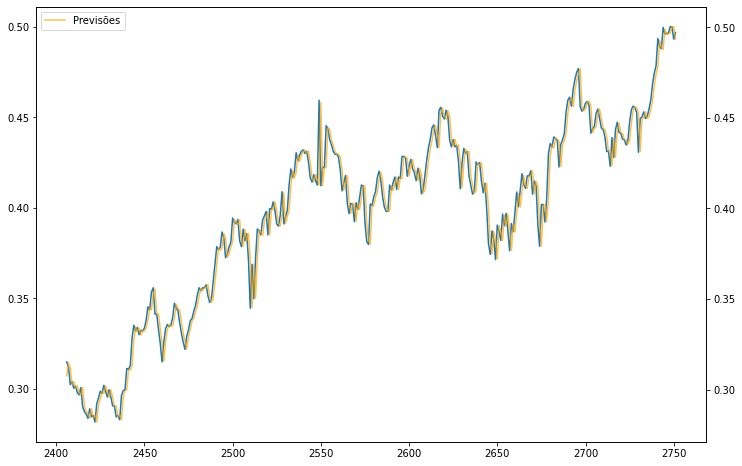

In [ ]:
fig, ax = pylab.subplots(1, 1, figsize=(12,8))
ax.plot(y_valid_f, label = 'Y')
axt = ax.twinx()
axt.plot(p_final, color = 'orange', alpha = 0.7, label='Previsões')
axt.legend()

In [ ]:
num = 6

In [ ]:
p[:num]

array([ 0.00013621, -0.00018345,  0.00014435,  0.00043042,  0.00032832,
        0.00041015])

In [ ]:
np.array(valid['Diff_close_next_week'])[:num]

array([ 0.00729123, -0.00324063, -0.00931653,  0.00162068, -0.00364598,
        0.00121533])

In [ ]:
y_valid_f = X_valid['Average_close_price_0'] + y_valid
y_valid_f = np.array(y_valid_f)[:num]

In [ ]:
p_final = X_valid['Average_close_price_0'] + p
p_final = np.array(p_final)[:num]

In [ ]:
round(np.sqrt(mean_squared_log_error(y_valid_f, p_final))*100, 4)

0.4044